In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing FRAV 3D dataset
Xtrain=[]
Xtest=[]
ytrain=[]
ytest=[]
for i in range(0,106):
    d=str(i+1)+'/'
    imglist=os.listdir(d)
    l=len(imglist)
    for j in range(l):
        im=cv2.imread(d+imglist[j],)
        if j==0 or j==l-1:
            Xtest.append(im)
            ytest.append(i)
        else:
            Xtrain.append(im)
            ytrain.append(i)

Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)
ytrain=np.array(ytrain)
ytest=np.array(ytest)

Xtrain=Xtrain/255
Xtest=Xtest/255

Xtrain.shape

(1484, 100, 100, 3)

In [3]:
Xtest.shape

(212, 100, 100, 3)

In [4]:
ytrain.shape

(1484,)

In [5]:
ytest.shape

(212,)

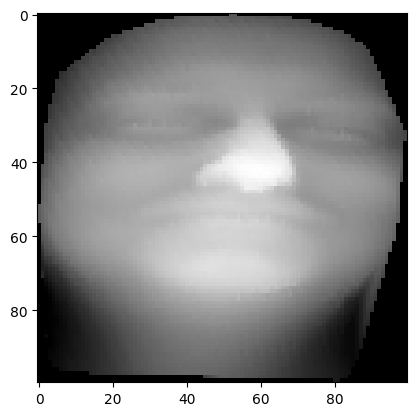

In [6]:
plt.imshow(Xtrain[1483])

In [7]:
ytrain[1483]

105

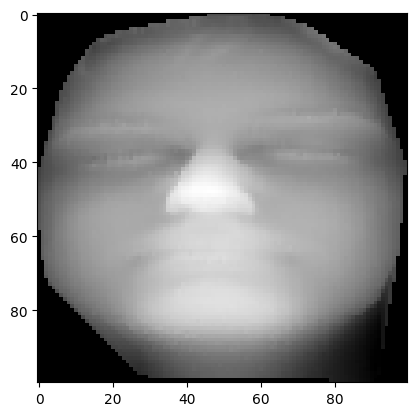

In [8]:
plt.imshow(Xtrain[211])

In [9]:
ytest[211]

105

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.applications import ResNet50V2

In [23]:
base_model=ResNet50V2(weights='imagenet',include_top=False,input_tensor=Input(shape=(100,100,3)))

In [24]:
for layer in base_model.layers[:-10]:
    layer.trainable=False

In [25]:
model=Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(250,activation='relu'))

model.add(Dense(106,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 4, 4, 2048)        23564800  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 250)               8192250   
                                                                 
 dense_7 (Dense)             (None, 106)               26606     
                                                                 
Total params: 31783656 (121.25 MB)
Trainable params: 11634920 (44.38 MB)
Non-trainable params: 20148736 (76.86 MB)
_________________________________________________________________


In [26]:
model.fit(Xtrain,ytrain,epochs=8,validation_data=(Xtest,ytest))

Epoch 1/8
47/47 [==============================] - 100s 2s/step - loss: 3.5198 - accuracy: 0.2871 - val_loss: 6.6580 - val_accuracy: 0.2642
Epoch 2/8
47/47 [==============================] - 84s 2s/step - loss: 0.8762 - accuracy: 0.7803 - val_loss: 4.2720 - val_accuracy: 0.4245
Epoch 3/8
47/47 [==============================] - 83s 2s/step - loss: 0.2904 - accuracy: 0.9185 - val_loss: 2.1595 - val_accuracy: 0.6415
Epoch 4/8
47/47 [==============================] - 83s 2s/step - loss: 0.1559 - accuracy: 0.9562 - val_loss: 1.7425 - val_accuracy: 0.6698
Epoch 5/8
47/47 [==============================] - 83s 2s/step - loss: 0.1132 - accuracy: 0.9643 - val_loss: 2.1026 - val_accuracy: 0.7075
Epoch 6/8
47/47 [==============================] - 83s 2s/step - loss: 0.2087 - accuracy: 0.9535 - val_loss: 1.6663 - val_accuracy: 0.7170
Epoch 7/8
47/47 [==============================] - 83s 2s/step - loss: 0.1322 - accuracy: 0.9623 - val_loss: 1.9215 - val_accuracy: 0.7075
Epoch 8/8
47/47 [=========

In [27]:
yprob=model.predict(Xtest)
yprob.shape

7/7 [==============================] - 10s 1s/step


(212, 106)

In [28]:
ypred=yprob.argmax(axis=1)
ypred.shape

(212,)

In [29]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.50      0.67         2
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         2
           4       1.00      0.50      0.67         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      0.50      0.67         2
          13       0.50      1.00      0.67         2
          14       1.00      0.50      0.67         2
          15       1.00      1.00      1.00         2
          16       0.67      1.00      0.80         2
          17       1.00    

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[]

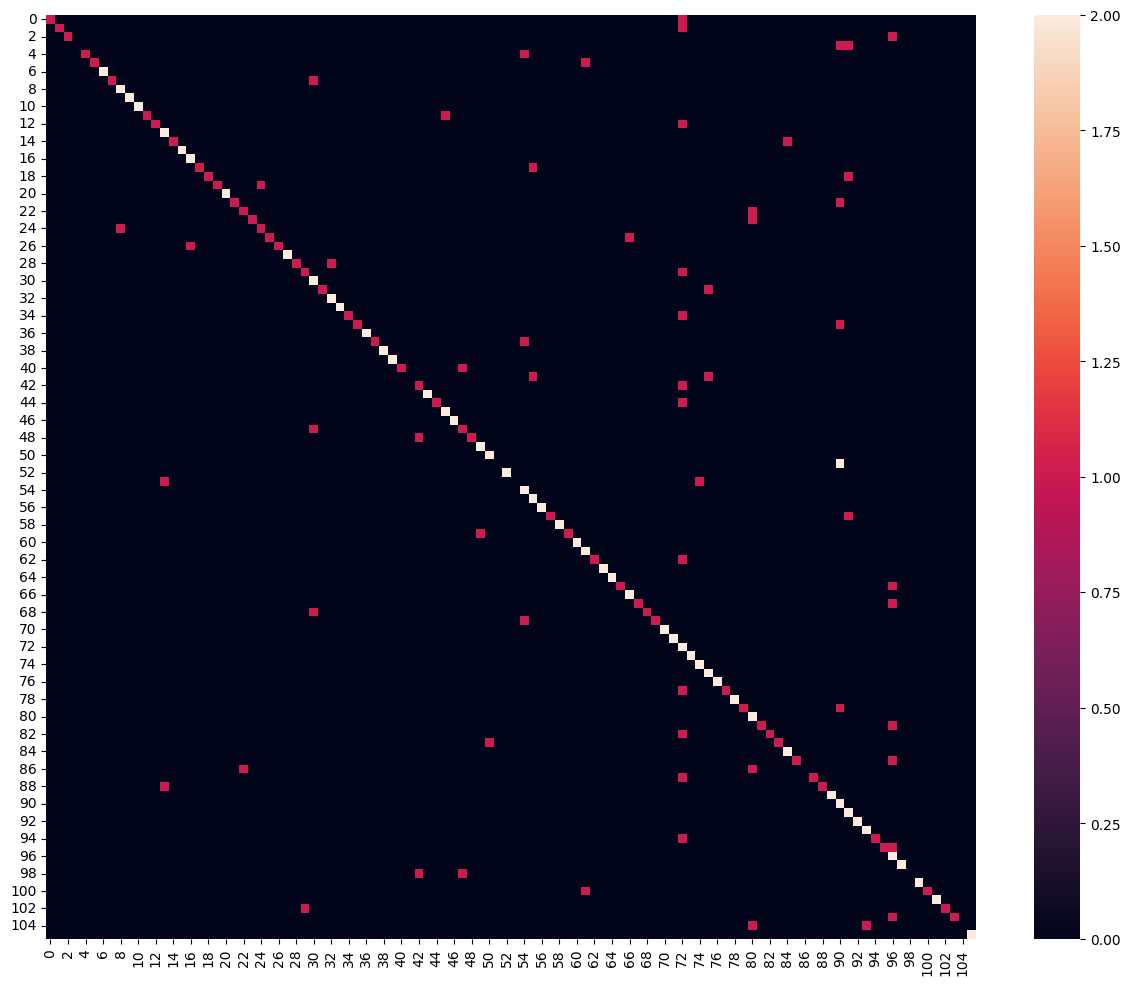

In [30]:
conm=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,12))
sns.heatmap(data=conm)
plt.plot()